In [5]:
import numpy as np
import scipy.stats as s
import configparser
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)
import matplotlib.pyplot as plt
import scipy.stats as ss
from datetime import datetime
from itertools import groupby
import pickle
from collections import namedtuple, defaultdict
from scipy import stats

import re

from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/marat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
data = pd.read_csv('target/test_predict_243k_balanced_2911_0_20171129T162503.tsv', sep='\t', na_values='None')


In [22]:
data.groupby('result').count()

,chat_id,user,question,best_answer,random_answer,context,best_discriminator,random_discriminator,time_asked,time_answered
result,,,,,,,,,,
best,25,25,25,25,25,25,25,25,25,25
equal,131,131,131,131,131,131,131,131,131,131
random,36,36,36,36,36,36,36,36,36,36


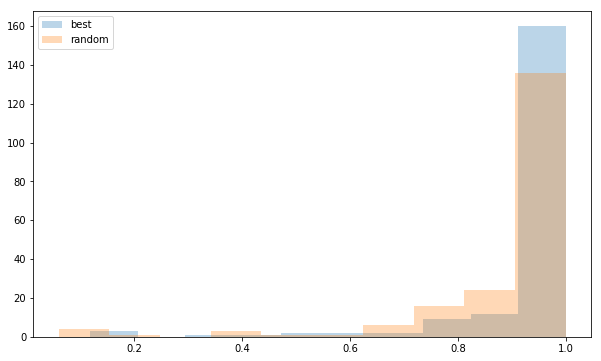

In [23]:
plt.hist(data['best_discriminator'], label='best', alpha=0.3)
plt.hist(data['random_discriminator'], label='random', alpha=0.3)
plt.legend()
plt.show()

In [16]:

data['best_discriminator'].mean(), data['random_discriminator'].mean()

(0.93289531193633768, 0.89600645157105141)

In [18]:
from run_bot_choose_best import prepare_dataset, INPUT_FILE

input = prepare_dataset(INPUT_FILE)
# with open('downloads/test_predict_243k_balanced_2911_0.csv_pickbest.pickle', 'rb') as f:
#     dataset = pickle.load(f)


In [19]:
scores = []
for context, rows in input.items():
    bot_rows = [r for r in rows if r.operator == 'bot']
    scores.extend(r.discriminator for r in bot_rows)

In [20]:
np.mean(scores)

0.89537663030364634